# __The Bootstrap for Regression__

---

<br>

__DATA 5600__ <br>
Author:      Tyler J. Brough <br>
Last Update: April 25, 2022 <br>

---

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
%matplotlib inline

<br>

## __IID Parametric Bootstrap for Regression__

### __Algorithm (IID Parametric Bootstrap)__

---

1. Fit the regression model via OLS, and obtain 

<br>

$$
{\large \hat{y} = \hat{\alpha} + \hat{\beta}_{1} x_{1} + \hat{\beta}_{2}}
$$

<br>


2. Form the estimated residuals as 

<br>

$$
{\large
\begin{aligned}
\hat{u}_{i} &= y_{i} - \hat{y}_{i} \\
            &= y_{i} - \hat{\alpha} - \hat{\beta}_{1} x_{1,i} - \beta{\beta}_{2} x_{2,i}
\end{aligned}}
$$

<br>


3. Draw $\quad u_{1}^{(1)}, u_{2}^{(1)}, \ldots, u_{n}^{(1)} \quad$ with replacement from $\quad \{\hat{u}_{i}\}_{i=1}^{n}$


4. Generate $\quad y_{1}^{(1)}, y_{2}^{(1)}, \ldots, y_{n}^{(1)} \quad$ as 

<br>

$$
{\large y_{i}^{(1)} = \hat{\alpha} + \hat{\beta}_{1} x_{1,i} + \hat{\beta}_{2} x_{2,i} + u_{i}^{(1)}}
$$

<br>

5. Re-estimate the regression model and save the following:

<br>

$$
{\large \{\hat{\alpha}^{(1)}, \hat{\beta}_{1}^{(1)}, \hat{\beta}_{2}^{(1)} \}}
$$

<br>

6. Repeat steps 3-5 for $b = 2, \ldots, B$

7. Form histograms, hypothesis tests, confidence intervals, etc using these bootstrap replications (approximating the sampling distribution) from 

<br>

$$
{\large \{\hat{\alpha}^{(b)}, \hat{\beta}_{1}^{(b)}, \hat{\beta}_{2}^{(b)} \} \quad b = 1, \ldots, B}
$$

<br>

---

<br>

## Parametric Bootstrapping the House Price Data

<br>

In [3]:
df = pd.read_excel("data/HPRICE.XLS")

In [4]:
df.head()

,sale price,lot size,#bedroom,#bath,#stories,driveway,rec room,basement,gas,air cond,#garage,desire loc
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [5]:
y = df['sale price']
n = y.shape[0]
x1 = df['lot size']
x2 = df['#bedroom']
X = np.ones((n,3))
X[:,1] = x1
X[:,2] = x2

In [7]:
## Step 1: fit the regression via OLS
reg = sm.OLS(y, X)
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             sale price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     159.6
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           2.95e-55
Time:                        11:38:17   Log-Likelihood:                -6213.1
No. Observations:                 546   AIC:                         1.243e+04
Df Residuals:                     543   BIC:                         1.245e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5612.5997   4102.819      1.368      0.1

In [11]:
alpha_hat = results.params.const
beta1_hat = results.params.x1
beta2_hat = results.params.x2
uhat = results.resid

In [19]:
## We will focus on beta1

## Set the number of bootstrap repititions
B = 10_000

## Allocate array to store bootstrapped beta1's
beta1_hat_b = np.empty(B)

## Simulation loop (Step 6 implied in the loop)
for b in range(B):
    
    ## Step 4
    uhat_b = np.random.choice(uhat, size=n)
    y_b = alpha_hat + beta1_hat * x1 + beta2_hat * x2 + uhat_b
    
    ## Step 5
    reg_b = sm.OLS(y_b, X)
    results = reg_b.fit()
    beta1_hat_b[b] = results.params.x1

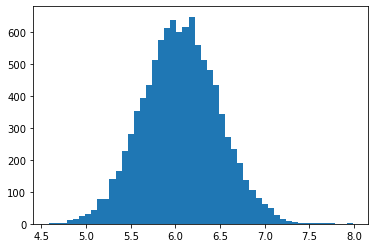

In [21]:
## Step 7
plt.hist(beta1_hat_b, bins=50);

In [22]:
beta1_hat_b.mean(), beta1_hat_b.std(ddof=1)

(6.057077620348657, 0.42568747423820064)

<br>

## __Nonparametric Bootstrap for Regression__

### __Algorithm (Nonparametric Bootstrap)__

---

1. Draw $\quad \{(y_{i}^{(1)},x_{1,i}^{(1)}, x_{2,i}^{(1)}), i=1, \ldots, n \} \quad$ from the original data (in row-wise pairs) with replacement.

2. Estimate the regression and store $\quad {\large \{\hat{\alpha}^{(1)}, \hat{\beta}_{1}^{(1)}, \hat{\beta}_{2}^{(1)} \}}$

<br>

$$
{\large y^{(1)} = \alpha + \beta_{1} x_{1}^{(1)} + \beta_{2} x_{2}^{(1)} + \epsilon}
$$

<br>



3. Repeat step 2 for $b = 2, \ldots, B$ and save

<br>

$$
{\large \{\hat{\alpha}^{(b)}, \hat{\beta}_{1}^{(b)}, \hat{\beta}_{2}^{(b)} \}_{b=2}^{B}}
$$

<br>


4. Form histograms, hypothesis tests, confidence intervals, etc from 

<br>

$$
{\large \{\hat{\alpha}^{(b)}, \hat{\beta}_{1}^{(b)}, \hat{\beta}_{2}^{(b)} \}_{b=2}^{B}}
$$

<br>

---

<br>

## Nonparametric Bootstrapping the House Price Data

<br>

In [26]:
## Set the number of bootstrap repititions 
B = 10_000

## Allocate array to store beta1's (still focus on those - arbitrarily)
beta1_hat_b = np.empty(B)

## Set indices for convenience in bootstrapping to create masked arrays
indices = np.arange(1,n)

## Main simulation loop (Step 3 implied in the loop)
for b in range(B):
    
    ## Step 1 - draw the data nonparametrically with replacement
    ii = np.random.choice(indices, size=n)
    y_b = y[ii]
    x1_b = x1[ii]
    x2_b = x2[ii] 
    X_b = np.ones((n,3))
    X_b[:,1] = x1_b
    X_b[:,2] = x2_b
    
    ## Step 2 - estimate the regression on the bootstrapped data
    reg_b = sm.OLS(y_b, X_b)
    res_b = reg_b.fit()
    beta1_hat_b[b] = res_b.params.x1

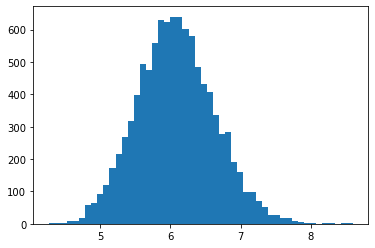

In [27]:
## Step 4 - histograms, etc
plt.hist(beta1_hat_b, bins=50);